In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv(r'E:\KULIAH\Semester 6\ML2\mobil_listrik.csv')

In [9]:
print(dataset.dtypes)


id_komentar      object
nama_akun        object
tanggal          object
text_cleaning    object
sentimen         object
dtype: object


In [10]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada kolom 'id_komentar' jika ada
if dataset['id_komentar'].dtype == 'object':
    dataset['id_komentar'] = label_encoder.fit_transform(dataset['id_komentar'])

# Melakukan encoding pada kolom 'nama_akun' jika ada
if dataset['nama_akun'].dtype == 'object':
    dataset['nama_akun'] = label_encoder.fit_transform(dataset['nama_akun'])

# Melakukan encoding pada kolom 'tanggal' jika ada
if dataset['tanggal'].dtype == 'object':
    dataset['tanggal'] = label_encoder.fit_transform(dataset['tanggal'])

# Melakukan encoding pada kolom 'text_cleaning' jika ada
if dataset['text_cleaning'].dtype == 'object':
    dataset['text_cleaning'] = label_encoder.fit_transform(dataset['text_cleaning'])

# Melakukan encoding pada kolom 'sentimen' jika ada
if dataset['sentimen'].dtype == 'object':
    dataset['sentimen'] = label_encoder.fit_transform(dataset['sentimen'])

# Konversi tipe data yang tersisa menjadi numerik jika memungkinkan
dataset = dataset.apply(pd.to_numeric, errors='ignore')


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dataset['id_komentar'] = label_encoder.fit_transform(dataset['id_komentar'])

dataset['sentimen'] = label_encoder.fit_transform(dataset['sentimen'])

print(dataset.dtypes)


id_komentar      int64
nama_akun        int32
tanggal          int32
text_cleaning    int32
sentimen         int64
dtype: object


In [12]:
X = dataset.iloc[:, [0, 4]].values  
y = dataset.iloc[:, 2].values   

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0, C=1.0)  
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [16]:
classifier_lin = SVC(kernel='linear',random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier_lin.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [18]:
y_pred_lin = classifier_lin.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_lin = confusion_matrix(y_test, y_pred_lin)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       1.0
          36       0.00      0.00      0.00       0.0
          41       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       0.0
          55       0.00      0.00      0.00       1.0
          57       0.00      0.00      0.00       1.0
          58       0.00      0.00      0.00       1.0
          60       0.00      0.00      0.00       1.0
          63       0.00    

c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [21]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (1137, 2)
Shape of y_train: (1137,)


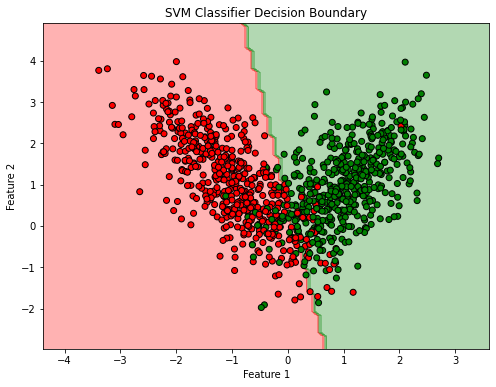

In [22]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Membuat dataset sintetis untuk contoh
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=0)

# Membuat model SVM dengan kernel linear
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X, y)

# Visualisasi batas keputusan SVM
plt.figure(figsize=(8, 6))

# Membuat meshgrid untuk plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Mengklasifikasikan setiap titik pada meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil klasifikasi
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classifier Decision Boundary')
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


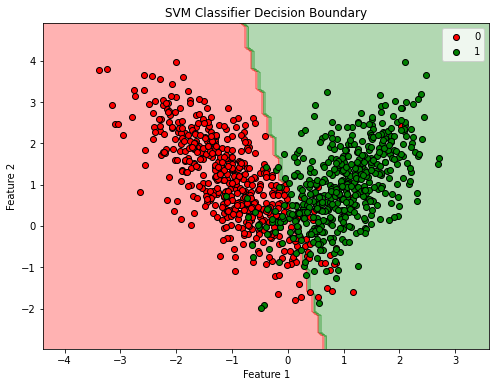

In [23]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Membuat dataset sintetis untuk contoh
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=0)

# Membuat model SVM dengan kernel linear
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X, y)

# Visualisasi batas keputusan SVM
plt.figure(figsize=(8, 6))

# Membuat meshgrid untuk plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Mengklasifikasikan setiap titik pada meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil klasifikasi
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Scatter plot untuk setiap kelas
for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1], c=ListedColormap(('red', 'green'))(i), label=j, edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classifier Decision Boundary')
plt.legend()
plt.show()


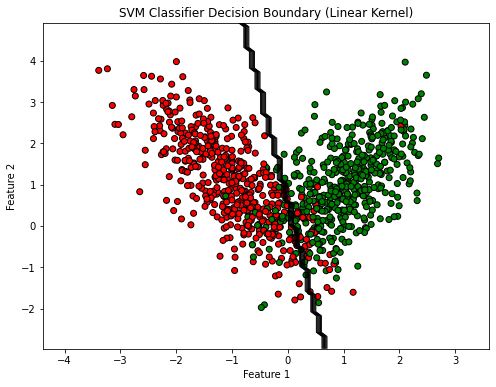

In [2]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Membuat dataset sintetis untuk contoh
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=0)

# Membuat model SVM dengan kernel linear
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X, y)

# Visualisasi batas keputusan SVM dengan kernel linear
plt.figure(figsize=(8, 6))

# Membuat meshgrid untuk plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Mengklasifikasikan setiap titik pada meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil klasifikasi
plt.contour(xx, yy, Z, colors='k', linewidths=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classifier Decision Boundary (Linear Kernel)')
plt.show()


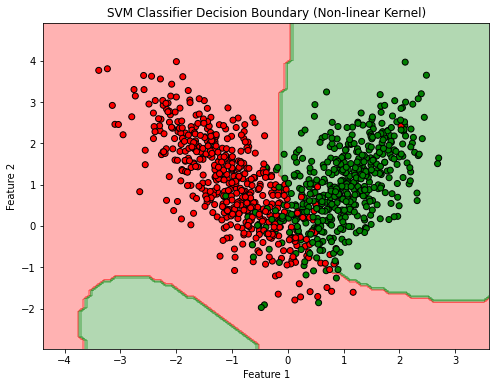

In [3]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Membuat dataset sintetis untuk contoh
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=0)

# Membuat model SVM dengan kernel RBF (non-linear)
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X, y)

# Visualisasi hasil klasifikasi dengan kernel non-linear
plt.figure(figsize=(8, 6))

# Membuat meshgrid untuk plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Mengklasifikasikan setiap titik pada meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil klasifikasi
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classifier Decision Boundary (Non-linear Kernel)')
plt.show()
